=== Stagewise results ===
V' (kgmol/h) = 29.7
L' (kgmol/h) = 108.0
L'/V' = 3.6363636363636362
Y_in = 0.010101010101010102
Y_out = 0.0010101010101010099
N_theoretical (float) = 3.6071871913513127
N_theoretical (ceiling) = 4


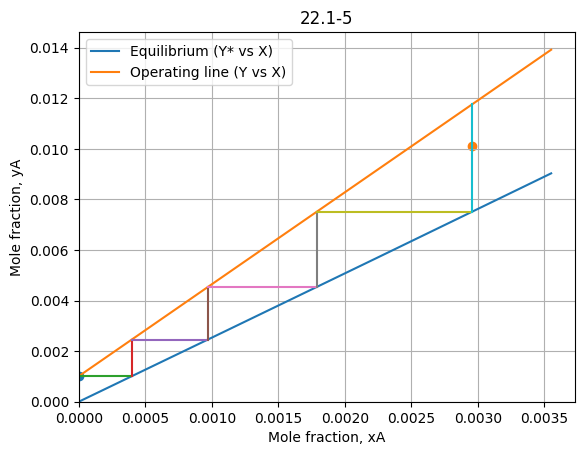

In [ ]:
# notebook cell: 22.1_5.py

import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from bank.Absorption.absorption_countercurrent_stages_base import (
    CountercurrentAbsorptionSpec,
    compute_solutefree_flows,
    stage_count_graphical_stepoff,
    Y_from_y,
    X_from_x,
    Yeq_from_X_linear,
)

# Given
yA_in = 0.010            # 1.0 mol% acetone in gas
V_in_total = 30.0        # kgmol/h total inlet gas
L_in_total = 108.0       # kgmol/h inlet pure water
m = 2.53                 # equilibrium: yA = m xA
fraction_absorbed = 0.90 # 90% absorbed

# Solve stages (step-off)
spec = CountercurrentAbsorptionSpec(
    m=m,
    V_in_total=V_in_total,
    yA_in=yA_in,
    L_in_total=L_in_total,
    xA_in=0.0,
    fraction_absorbed=fraction_absorbed,
)

res = stage_count_graphical_stepoff(spec, max_stages=200)

V_prime = res["V_prime"]
L_prime = res["L_prime"]
LV = L_prime / V_prime

Y_in = res["Y_in"]     # Y_{N+1}
Y_out = res["Y_out"]   # Y_1
X0 = res["X_in"]       # X_0

X_pts = res["X_points"]  # [X0, X1, X2, ...]
Y_pts = res["Y_points"]  # [Y1, Y2, Y3, ...]

print("=== Stagewise results ===")
print("V' (kgmol/h) =", V_prime)
print("L' (kgmol/h) =", L_prime)
print("L'/V' =", LV)
print("Y_in =", Y_in)
print("Y_out =", Y_out)
print("N_theoretical (float) =", res["N_theoretical"])
print("N_theoretical (ceiling) =", res["N_ceiling"])

# Build curves for plotting
X_max = max(X_pts) * 1.20 + 1e-12
X_grid = np.linspace(0.0, max(1e-12, X_max), 600)

Y_eq = np.array([Yeq_from_X_linear(m, X) for X in X_grid])

# Operating line in Y-X ratio coordinates:
#   Y = Y_out + (L'/V') (X - X0)
Y_op = Y_out + LV * (X_grid - X0)

# Plot
plt.figure()
plt.plot(X_grid, Y_eq, label="Equilibrium (Y* vs X)")
plt.plot(X_grid, Y_op, label="Operating line (Y vs X)")

# Steps (horizontal to equilibrium, vertical to operating line)
# Index meaning:
#   X_pts[0]=X0; Y_pts[0]=Y1 (=Y_out)
#   For stage i=1..k:
#     horizontal: (X_{i-1}, Y_i) -> (X_i, Y_i)
#     vertical:   (X_i, Y_i)     -> (X_i, Y_{i+1})
n_segments = min(len(X_pts) - 1, len(Y_pts) - 1)

for i in range(1, n_segments + 1):
    # Y_i is Y_pts[i-1]
    Yi = Y_pts[i - 1]
    # Horizontal
    plt.plot([X_pts[i - 1], X_pts[i]], [Yi, Yi])
    # Vertical
    plt.plot([X_pts[i], X_pts[i]], [Yi, Y_pts[i]])

# Mark endpoints
plt.scatter([X0], [Y_out])
plt.scatter([X_pts[-1]], [Y_in])

plt.xlabel("Mole fraction, xA")
plt.ylabel("Mole fraction, yA")
plt.title("22.1-5")
plt.xlim(left=0.0)
plt.ylim(bottom=0.0)
plt.legend()
plt.grid(True)
plt.show()